## 미리 학습된 언어 모델
### 언어 모델
- 단어 시퀀스에 확률을 부여하는 모델. 단어 시퀀스를 입력받아 해당 시퀀스가 얼마나 그럴듯 한지 확률을 출력. 출력으 n개 단어가 동시에 나타날ㄹ 결합 확룰(joint probability) 내포.

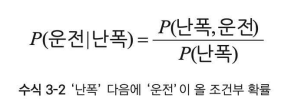

- 결과가 되는 사건 (운전)은 조건이 되는 사건(난폭)의 영향을 받아 변한다는 개념 내포

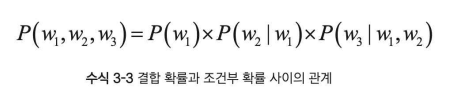

- 단어 3개로 구성된 문장이 나타나려면 다은 3가지 사건이 동시에 일어나야한다.
- 전체 단어 시퀀스가 나타날 확률(수식 좌변)은 이전 단어들이 주어졌을 때 다음 단어가 등장할 확률의 연쇄(수식 우변)와 같다.

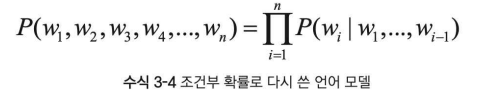

### 순방향 언어 모델 (forward language model)
- 문장 앞부터 뒤로, 사람이 이해하는 순서대로 계산하는 모델
- GPT, ELMo같은 모델이 이런 방식으로 pre-train
- 검은색 단어는 context, 주황색 단어는 맞춰야할 단어

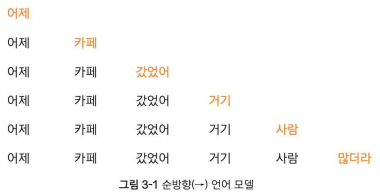

### 역방향 언어 모델 (backward language model)
- 문장 뒤부터 앞으로 계산
- ELMo같은 모델이 이런 방식으로 pre-train
    - ELMo(Embeddings from Language Models)는 순방향, 역방향 언어 모델을 모두 활용

### 넓은 의미의 언어모델
- context가 전제된 상태에서 특정 단어(w)가 나타날 조건부 확률
- 단어나 단어 시퀀스로 구성된 context를 입력 받아 특정 단어가 나타날 확률을 출력

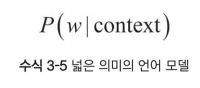

#### 마스크 언어 모델 (masked language model)
- 학습대상 문장에 빈칸을 만들어 놓고 (masked) 해당 빈 칸에 올 단어로 적절한 단어가 무엇일지 분류하는 과정으로 학습
- BERT가 마스크 언어 모델로 pre-train하는 대표적인 모델
- 맞힐 단어를 계산할 때 문장 전체의 맥락으로 참고할 수 있다는 장점
- 마스크 언어 모델은 *bidirectional* 성질이 있음

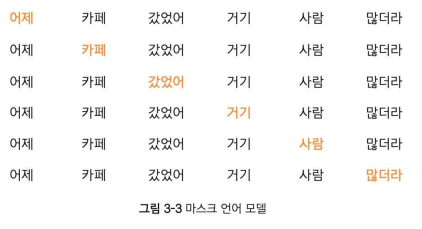

#### 스킵-그램 모델 (skip-gram model)
- 어떤 단어 앞뒤에 특정 범위를 정해 두고 이 범위 내에 어떤 단어들이 올지 분류하는 과정 학습
- context로 설정한 단어 주변에 어떤 단어들이 분포해 있는지 학습
- Word2Vec이 스킵-그램 모델 방식으로 학습함

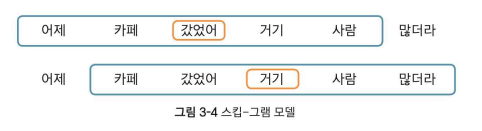

- **갔었어** 주변에 어제, 카페, 거기, 사람이 나타날 확률을 각각 높이는 방식으로 학습

### 언어 모델의 유용성
- 잘 학습된 언어모델 : 어떤 문장이 자연스러운지, 학습 대상 언어의 풍부한 맥락 포함, 기계번역, 문법교정, 문장 생성 등 다양한 테스크 수행 가능

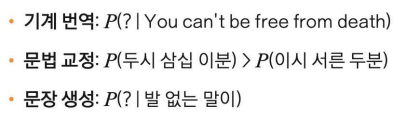

- 주목받는 이유 
    - 데이터 제작 비용 : 사람이 수작업해야하는 레이블이 없어도 많은 학습 데이터를 싼 값에 만들어 낼 수 있음
    - tranfer learning : pre-train한 언어 모델을 문서 분류, 개체명 인식 등 다운스트림 테스크에 적용하면 적은 양의 데이터로도 그 성능을 큰 폭으로 올릴 수 있음

## 트랜스포머 
### sequence-to-sequence
- 트랜스포머 : 기계번역 등 seq2seq과제를 수행하는 모델
- 시퀀스 : 단어 같은 무언가의 나열
- seq2seq : 특정 속성을 지닌 시퀀스(소스 시퀀스)를 다른 속성의 시퀀스(타깃 시퀀스)로 변환하는 작업. 소스와 타깃의 길이가 달라도 해당 과제를 수행하는데 문제가 없어야함
- 예, 기계번역 : 어떤 언어(source)의 토큰 시퀀스를 다른 언어(target)의 토큰 시퀀스로 변환. 소스 시퀀스의 길이와 타깃 시퀀스의 길이가 다를 수 있다
### 인코더와 디코더
- 시퀀스과제 수행 모델을 대개 인코더와 디코더 2개 파트로 구성
- **인코더** : 소스 시퀀스의 정보를 압축해 디토더로 내보내는 역할. 
    - 인코딩 : 인코더가 소스 시퀀스 정보를 압축하는 과정
- **디코더** : 인코더가 보내준 소스 시퀀스 정보를 받아서 타깃 시퀀스 생성
    - 디코딩 : 디코더가 타깃 시퀀스를 생성하는 과정
- **트랜스포머** : 인코더의 입력은 소스 시퀀스, 디코더의 입력은 타깃 시퀀스의 일부

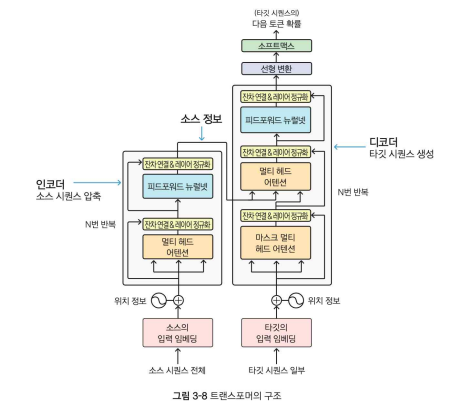

- 예, 인코더 입력은 '어제, 카페, 갔었어, 거기, 사람, 많더라', 디코더 입력은 '< s >'
- 디코더는 인코더에서 보내온 정보와 현재 디코더 이벽을 모두 고려해 다음 토큰을 맞힘
- 트랜스포머 학습은 입력이 주어졌을때 정답에 해당하는 단어의 확률값을 높이는 방식으로 수행
- 특징
    - 학습 중 디코더 입력과 실제 기계번역에 사용할 때(인퍼런스)의 디코더 입력 다름
    - 학습 과정에서는 디코더 입력에 맞춰야 할 단어(went) 이전의 정답 타깃 시퀀스 (< s > I)를 넣어줌
    - 인퍼런스 때는 현재 디코더입력 지전 디코딩 결과를 사용

### 트랜스포머 인코더 블록
- 트랜스포머 인코더 가운데 반복되는 요소. 블록 또는 레이어라고 부른다

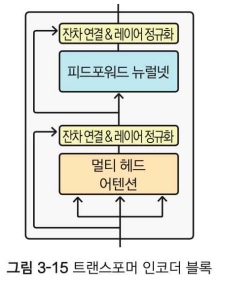

- 구성요소
    - 멀티 헤드 어텐션(multi-head attention)
    - 피드포워드 뉴럴 네트워크(feedforward neural network)
    - 잔차 연결(resicual connection) 및 레이어 정규화(layer normalization)

### 트랜스포머 디코더 블록

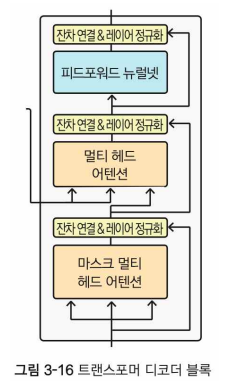

- 인코더 블록과 본질적으로는 다르지 않음
- 마스크를 적용한 멀티 헤드 어텐션
- 인코더가 보내온 정보와 디코더 입력을 함께 이용, 멀티 헤드 어텐션을 수행하는 모듈 추가

> 멀티 헤드 어텐션, 마스크 멀티 헤드 어텐션 : 3갈래 (K,Q,V) key query value

### 셀프 어텐션
- 트랜스포머 구조에서 멀티헤드 어텐션은 셀프 어텐션이라고 불림
- **어텐션**
    - 시퀀스 입력에 수행하는 기계학습 방법의 일종
    - 시퀀스 요소 가운데 중요한 요소에 집중
- 셀프 어텐션 : 자신에게 수행하는 어텐션 기법.
    - 입력 시퀀스 가운데 테스크 수행에 의미있는 요소들 위주로 정보를 추출

#### 합성곱 신경만 CNN과 비교
- CNN의 경우 *합성곱 필터*라는 특수한 장치를 이용해 시퀀스의 지역적인 특징을 잡아낸다
- 하지만 필터 크기를 넘어서는 문맥은 읽어내가 어렵다.

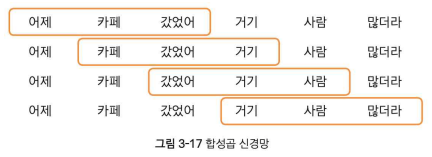

#### 순환 신경망 RNN과 비교

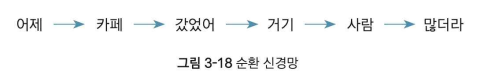

- RNN에서는 시퀀스 길이가 길어질수록 정보 압축에 문제가 발생한다.
- 오래된 단어는 잊어버리거나 특정 단어 정보를 과도하게 반영해 전체 정보를 왜곡하는 경우도 발생

#### 어텐션과 비교
- 디코더 쪽 RNN에 어텐션을 추가하는 방식
- 디코더가 타깃 시퀀스를 생성할때 소스 시퀀스 전체에서 *어떤 요소에 주목해야 할지를 알려줌*
- 주요 차이
    - 어텐션은
        - 소스 시퀀스 전체 단어들과 타깃 시퀀스 하나 사이를 연결
        - RNN 구조 위에서 동작
        - 타깃 언어의 단어를 1개 생성할 때 1회 수행
    - 셀프 어텐션은 
        - 입력 시퀀스 전체 단어들사이를 연결
        - RNN 구조 없이 동작
        - 타깃 언어의 단어를 1개 생성할 때 인코더, 디코더 블록의 개수만큼 반복수행

#### 특징 및 장점
- 잘 학습된 셀프 어텐션 모델이라면 *거기* 에 대응하는 장소는 *카페* 이고, *갔었어* 와도 연관이 있음을 확인
    - 인코더 블록내에서 *거기*라는 단어를 인코딩할 때 *카페, 갔었어* 라는 연관있는 단어의 의미를 강조해서 반영

### 셀프 어텐션
- 수행 대상 : 입력 시퀀스 전체
- 개별 단어와 전체 입력 시퀀스를 대상으로 어텐션 계산으 수행해 문맥 전체를 고려
- 모든 경우의 수를 고려하기 때문에 시퀀스 길이가 길어지더라도 정보를 잊거나 왜곡할 염려가 없음
#### 계산 예시
- 쿼리(Query), 키(key), 벨류(Value) 3가지 요소가 서로 영향을 주고받는 구조
- 문장 내 각 단어가 벡터 형태로 입력되고 각 단어 벡터는 계산 과정을 거처 쿼리, 키, 벨류 3가지로 변환된다.
- 벨류는 쿼리 단어와 모든 키 단어와의 관곟바이 1인 확률값으로 나타낸다
